In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./datasets/강남.csv')
# df.drop('건물연식',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif


# OLS - Scaling 후

## R_OLS_1

In [35]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85320
Method:                          IRLS   Df Model:                           19
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:01                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1441      0.020    257.302      0.000       5.105       5.183
건물면적(㎡)               1.4771      0.006    243.129      0.000       1.465       1.489
층                     0.2940      0.006     49.293      0.000       0.282       0.306
KOSPI종가              -0.0669      0.015     -4.596      0.000      -0.095      -0.038
Fed기준금리              -0.0598      0.008     -7.691      0.000      -0.075      -0.045
국제유가(Dubai)($/배럴)     0.1427      0.008     16.798      0.000       0.126       0.159
부동산거래량               -0.0009      0.004     -0.192      0.848      -0.010       0.008
국고채5년(평균)            -0.4136      0.043     -9.601      0.000      -0.498      -0.329
국고채10년(평균)            0.4417      0.030     14.654      0.000       0.383       0.501
회사채3년(평균)             0.1102      0.012      8.901      0.000       0.086       0.134
CD91물(평균)            -0.2285      0.019    -12.050      0.000      -0.266      -0.191
BOK기준금리              -0.0730      0.015     -4.864      0.000      -0.102      -0.044
건물연식                  0.1350      0.003     49.180      0.000       0.130       0.140
GDP대비가계부채비율          -0.1428      0.014    -10.183      0.000      -0.170      -0.115
환율종가                 -0.0534      0.007     -7.649      0.000      -0.067      -0.040
선행지수순환변동치             0.0613      0.010      6.073      0.000       0.042       0.081
EPU                  -0.0134      0.004     -3.135      0.002      -0.022      -0.005
장단기금리spread          -0.2352      0.019    -12.156      0.000      -0.273      -0.197
금값종가                 -0.1495      0.013    -11.132      0.000      -0.176      -0.123
LTV                  -0.3327      0.005    -66.200      0.000      -0.343      -0.323
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 부동산거래량 컬럼 삭제

In [36]:
X_scaled.drop('부동산거래량', axis=1, inplace=True)

## R_OLS_2

In [37]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85321
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:06                                         
No. Iterations:                    25                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1440      0.020    257.629      0.000       5.105       5.183
건물면적(㎡)               1.4771      0.006    243.167      0.000       1.465       1.489
층                     0.2940      0.006     49.306      0.000       0.282       0.306
KOSPI종가              -0.0677      0.014     -4.802      0.000      -0.095      -0.040
Fed기준금리              -0.0597      0.008     -7.703      0.000      -0.075      -0.044
국제유가(Dubai)($/배럴)     0.1424      0.008     17.121      0.000       0.126       0.159
국고채5년(평균)            -0.4129      0.043     -9.608      0.000      -0.497      -0.329
국고채10년(평균)            0.4417      0.030     14.655      0.000       0.383       0.501
회사채3년(평균)             0.1106      0.012      9.084      0.000       0.087       0.134
CD91물(평균)            -0.2289      0.019    -12.127      0.000      -0.266      -0.192
BOK기준금리              -0.0726      0.015     -4.895      0.000      -0.102      -0.044
건물연식                  0.1351      0.003     49.211      0.000       0.130       0.140
GDP대비가계부채비율          -0.1428      0.014    -10.194      0.000      -0.170      -0.115
환율종가                 -0.0535      0.007     -7.695      0.000      -0.067      -0.040
선행지수순환변동치             0.0618      0.010      6.278      0.000       0.042       0.081
EPU                  -0.0131      0.004     -3.219      0.001      -0.021      -0.005
장단기금리spread          -0.2360      0.019    -12.498      0.000      -0.273      -0.199
금값종가                 -0.1491      0.013    -11.227      0.000      -0.175      -0.123
LTV                  -0.3328      0.005    -66.361      0.000      -0.343      -0.323
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_2

In [38]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      5.290755            건물면적(㎡)
1      3.976560                  층
2    153.489706            KOSPI종가
3     48.727108            Fed기준금리
4     71.978766  국제유가(Dubai)($/배럴)
5   1191.750243          국고채5년(평균)
6    771.530466         국고채10년(평균)
7    115.086548          회사채3년(평균)
8    263.733646          CD91물(평균)
9    253.304056            BOK기준금리
10     4.572737               건물연식
11   114.715288        GDP대비가계부채비율
12    26.846003               환율종가
13   118.365150          선행지수순환변동치
14     5.265925                EPU
15   189.666295        장단기금리spread
16    62.594189               금값종가
17    30.863134                LTV


### 국고채5년(평균) 컬럼 삭제

In [39]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## R_OLS_3

In [40]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85322
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:23                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2295      0.018    293.662      0.000       5.195       5.264
건물면적(㎡)               1.4782      0.006    243.064      0.000       1.466       1.490
층                     0.2945      0.006     49.324      0.000       0.283       0.306
KOSPI종가              -0.0780      0.014     -5.544      0.000      -0.106      -0.050
Fed기준금리              -0.0804      0.007    -10.800      0.000      -0.095      -0.066
국제유가(Dubai)($/배럴)     0.1386      0.008     16.677      0.000       0.122       0.155
국고채10년(평균)            0.2120      0.018     11.648      0.000       0.176       0.248
회사채3년(평균)             0.0701      0.011      6.126      0.000       0.048       0.092
CD91물(평균)            -0.3016      0.017    -17.404      0.000      -0.336      -0.268
BOK기준금리              -0.1387      0.013    -10.501      0.000      -0.165      -0.113
건물연식                  0.1360      0.003     49.506      0.000       0.131       0.141
GDP대비가계부채비율          -0.1001      0.013     -7.548      0.000      -0.126      -0.074
환율종가                 -0.0303      0.007     -4.614      0.000      -0.043      -0.017
선행지수순환변동치             0.0719      0.010      7.341      0.000       0.053       0.091
EPU                  -0.0234      0.004     -5.929      0.000      -0.031      -0.016
장단기금리spread          -0.3627      0.014    -26.490      0.000      -0.390      -0.336
금값종가                 -0.1801      0.013    -14.025      0.000      -0.205      -0.155
LTV                  -0.3233      0.005    -65.421      0.000      -0.333      -0.314
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_3

In [41]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.250219            건물면적(㎡)
1     3.968043                  층
2   151.871389            KOSPI종가
3    43.052145            Fed기준금리
4    71.742987  국제유가(Dubai)($/배럴)
5   227.970135         국고채10년(평균)
6   101.698351          회사채3년(평균)
7   258.181187          CD91물(평균)
8   224.074126            BOK기준금리
9     4.547548               건물연식
10   90.144454        GDP대비가계부채비율
11   18.364140               환율종가
12  115.748101          선행지수순환변동치
13    5.077615                EPU
14  125.236411        장단기금리spread
15   61.694778               금값종가
16   23.795756                LTV


## CD91물(평균) 컬럼 삭제

In [42]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## R_OLS_4

In [43]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85323
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:38                                         
No. Iterations:                    38                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0431      0.014    351.445      0.000       5.015       5.071
건물면적(㎡)               1.4826      0.006    243.320      0.000       1.471       1.495
층                     0.2951      0.006     49.298      0.000       0.283       0.307
KOSPI종가              -0.0091      0.014     -0.675      0.500      -0.036       0.017
Fed기준금리              -0.0992      0.007    -13.432      0.000      -0.114      -0.085
국제유가(Dubai)($/배럴)     0.1345      0.008     16.142      0.000       0.118       0.151
국고채10년(평균)            0.0253      0.015      1.718      0.086      -0.004       0.054
회사채3년(평균)             0.1136      0.011     10.152      0.000       0.092       0.136
BOK기준금리              -0.2531      0.011    -22.105      0.000      -0.275      -0.231
건물연식                  0.1372      0.003     49.829      0.000       0.132       0.143
GDP대비가계부채비율          -0.0738      0.013     -5.579      0.000      -0.100      -0.048
환율종가                 -0.0071      0.006     -1.095      0.273      -0.020       0.006
선행지수순환변동치             0.1303      0.009     14.114      0.000       0.112       0.148
EPU                  -0.0200      0.004     -5.054      0.000      -0.028      -0.012
장단기금리spread          -0.2937      0.013    -22.409      0.000      -0.319      -0.268
금값종가                 -0.1513      0.013    -11.850      0.000      -0.176      -0.126
LTV                  -0.3063      0.005    -62.944      0.000      -0.316      -0.297
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### KOSPI종가 컬럼 삭제

In [44]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## R_OLS_5

In [45]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85324
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:44                                         
No. Iterations:                    40                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0403      0.014    365.463      0.000       5.013       5.067
건물면적(㎡)               1.4828      0.006    243.524      0.000       1.471       1.495
층                     0.2952      0.006     49.315      0.000       0.283       0.307
Fed기준금리              -0.0996      0.007    -13.507      0.000      -0.114      -0.085
국제유가(Dubai)($/배럴)     0.1340      0.008     16.160      0.000       0.118       0.150
국고채10년(평균)            0.0266      0.015      1.828      0.068      -0.002       0.055
회사채3년(평균)             0.1111      0.011     10.528      0.000       0.090       0.132
BOK기준금리              -0.2530      0.011    -22.104      0.000      -0.275      -0.231
건물연식                  0.1372      0.003     49.841      0.000       0.132       0.143
GDP대비가계부채비율          -0.0742      0.013     -5.614      0.000      -0.100      -0.048
환율종가                 -0.0059      0.006     -0.949      0.343      -0.018       0.006
선행지수순환변동치             0.1262      0.007     18.217      0.000       0.113       0.140
EPU                  -0.0196      0.004     -5.010      0.000      -0.027      -0.012
장단기금리spread          -0.2920      0.013    -22.694      0.000      -0.317      -0.267
금값종가                 -0.1535      0.012    -12.447      0.000      -0.178      -0.129
LTV                  -0.3055      0.005    -64.249      0.000      -0.315      -0.296
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 환율종가 컬럼 삭제

In [46]:
X_scaled.drop('환율종가', axis=1, inplace=True)

## R_OLS_6

In [47]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85325
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:48                                         
No. Iterations:                    22                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0337      0.012    426.099      0.000       5.011       5.057
건물면적(㎡)               1.4829      0.006    243.608      0.000       1.471       1.495
층                     0.2952      0.006     49.324      0.000       0.283       0.307
Fed기준금리              -0.1008      0.007    -13.873      0.000      -0.115      -0.087
국제유가(Dubai)($/배럴)     0.1375      0.007     18.494      0.000       0.123       0.152
국고채10년(평균)            0.0242      0.014      1.687      0.092      -0.004       0.052
회사채3년(평균)             0.1122      0.010     10.688      0.000       0.092       0.133
BOK기준금리              -0.2508      0.011    -22.409      0.000      -0.273      -0.229
건물연식                  0.1372      0.003     49.845      0.000       0.132       0.143
GDP대비가계부채비율          -0.0753      0.013     -5.722      0.000      -0.101      -0.049
선행지수순환변동치             0.1294      0.006     21.206      0.000       0.117       0.141
EPU                  -0.0206      0.004     -5.446      0.000      -0.028      -0.013
장단기금리spread          -0.2920      0.013    -22.695      0.000      -0.317      -0.267
금값종가                 -0.1507      0.012    -12.611      0.000      -0.174      -0.127
LTV                  -0.3054      0.005    -64.277      0.000      -0.315      -0.296
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 국고채10년(평균) 컬럼 삭제

In [48]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## R_OLS_7

In [49]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85326
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:15:55                                         
No. Iterations:                    47                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0310      0.012    429.176      0.000       5.008       5.054
건물면적(㎡)               1.4830      0.006    243.612      0.000       1.471       1.495
층                     0.2952      0.006     49.335      0.000       0.284       0.307
Fed기준금리              -0.0981      0.007    -13.854      0.000      -0.112      -0.084
국제유가(Dubai)($/배럴)     0.1360      0.007     18.396      0.000       0.121       0.150
회사채3년(평균)             0.1242      0.008     15.965      0.000       0.109       0.139
BOK기준금리              -0.2459      0.011    -22.685      0.000      -0.267      -0.225
건물연식                  0.1374      0.003     49.952      0.000       0.132       0.143
GDP대비가계부채비율          -0.0756      0.013     -5.744      0.000      -0.101      -0.050
선행지수순환변동치             0.1344      0.005     24.981      0.000       0.124       0.145
EPU                  -0.0194      0.004     -5.215      0.000      -0.027      -0.012
장단기금리spread          -0.2853      0.012    -23.380      0.000      -0.309      -0.261
금값종가                 -0.1568      0.011    -13.770      0.000      -0.179      -0.135
LTV                  -0.3045      0.005    -64.451      0.000      -0.314      -0.295
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_7

In [50]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.180544            건물면적(㎡)
1     3.929739                  층
2    40.118678            Fed기준금리
3    53.479788  국제유가(Dubai)($/배럴)
4    35.879945          회사채3년(평균)
5    51.798538            BOK기준금리
6     4.495493               건물연식
7    70.009474        GDP대비가계부채비율
8    31.947184          선행지수순환변동치
9     4.324333                EPU
10  101.846086        장단기금리spread
11   47.020917               금값종가
12   18.502391                LTV


### 장단기금리spread 컬럼 삭제

In [51]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## R_OLS_8

In [52]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85327
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:16:04                                         
No. Iterations:                    39                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8798      0.010    496.812      0.000       4.861       4.899
건물면적(㎡)               1.4877      0.006    243.880      0.000       1.476       1.500
층                     0.2977      0.006     49.615      0.000       0.286       0.309
Fed기준금리              -0.0785      0.007    -11.147      0.000      -0.092      -0.065
국제유가(Dubai)($/배럴)     0.0635      0.007      9.431      0.000       0.050       0.077
회사채3년(평균)            -0.0355      0.004     -9.476      0.000      -0.043      -0.028
BOK기준금리              -0.0964      0.009    -10.886      0.000      -0.114      -0.079
건물연식                  0.1399      0.003     50.773      0.000       0.135       0.145
GDP대비가계부채비율           0.0114      0.013      0.901      0.367      -0.013       0.036
선행지수순환변동치             0.0451      0.004     11.938      0.000       0.038       0.052
EPU                  -0.0219      0.004     -5.860      0.000      -0.029      -0.015
금값종가                 -0.1216      0.011    -10.747      0.000      -0.144      -0.099
LTV                  -0.2760      0.005    -60.406      0.000      -0.285      -0.267
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### GDP대비가계부채비율 컬럼 삭제

In [53]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

## R_OLS_9

In [54]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85328
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:16:07                                         
No. Iterations:                    20                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.8844      0.008    582.628      0.000       4.868       4.901
건물면적(㎡)               1.4873      0.006    244.403      0.000       1.475       1.499
층                     0.2976      0.006     49.610      0.000       0.286       0.309
Fed기준금리              -0.0754      0.006    -12.304      0.000      -0.087      -0.063
국제유가(Dubai)($/배럴)     0.0648      0.007      9.804      0.000       0.052       0.078
회사채3년(평균)            -0.0347      0.004     -9.557      0.000      -0.042      -0.028
BOK기준금리              -0.1020      0.006    -16.232      0.000      -0.114      -0.090
건물연식                  0.1400      0.003     50.794      0.000       0.135       0.145
선행지수순환변동치             0.0450      0.004     11.934      0.000       0.038       0.052
EPU                  -0.0218      0.004     -5.834      0.000      -0.029      -0.014
금값종가                 -0.1154      0.009    -12.934      0.000      -0.133      -0.098
LTV                  -0.2778      0.004    -66.995      0.000      -0.286      -0.270
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_9

In [55]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.138371            건물면적(㎡)
1     3.889692                  층
2    30.007349            Fed기준금리
3    44.220662  국제유가(Dubai)($/배럴)
4    10.002038          회사채3년(평균)
5    33.182089            BOK기준금리
6     4.433689               건물연식
7    16.831729          선행지수순환변동치
8     3.981744                EPU
9     5.820896               금값종가
10   17.689443                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [56]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## R_OLS_10

In [57]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85329
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:16:37                                         
No. Iterations:                    21                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8925      0.008    586.916      0.000       4.876       4.909
건물면적(㎡)        1.4881      0.006    244.176      0.000       1.476       1.500
층              0.2977      0.006     49.543      0.000       0.286       0.309
Fed기준금리       -0.0399      0.005     -8.066      0.000      -0.050      -0.030
회사채3년(평균)     -0.0238      0.003     -6.898      0.000      -0.031      -0.017
BOK기준금리       -0.1017      0.006    -16.170      0.000      -0.114      -0.089
건물연식           0.1394      0.003     50.522      0.000       0.134       0.145
선행지수순환변동치      0.0501      0.004     13.380      0.000       0.043       0.057
EPU           -0.0177      0.004     -4.759      0.000      -0.025      -0.010
금값종가          -0.1064      0.009    -11.946      0.000      -0.124      -0.089
LTV           -0.2754      0.004    -66.397      0.000      -0.284      -0.267
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_10

In [58]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    5.131992    건물면적(㎡)
1    3.888647          층
2   18.949397    Fed기준금리
3    8.885676  회사채3년(평균)
4   32.981503    BOK기준금리
5    4.433688       건물연식
6   16.454274  선행지수순환변동치
7    3.885466        EPU
8    4.689207       금값종가
9   17.338338        LTV


### BOK기준금리 컬럼 삭제

In [59]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## R_OLS_11

In [60]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85330
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:16:52                                         
No. Iterations:                    20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8091      0.007    730.342      0.000       4.796       4.822
건물면적(㎡)        1.4864      0.006    243.474      0.000       1.474       1.498
층              0.2970      0.006     49.335      0.000       0.285       0.309
Fed기준금리       -0.0849      0.004    -20.729      0.000      -0.093      -0.077
회사채3년(평균)     -0.0213      0.003     -6.159      0.000      -0.028      -0.015
건물연식           0.1383      0.003     50.023      0.000       0.133       0.144
선행지수순환변동치      0.0691      0.004     19.388      0.000       0.062       0.076
EPU           -0.0042      0.004     -1.162      0.245      -0.011       0.003
금값종가          -0.0124      0.007     -1.828      0.068      -0.026       0.001
LTV           -0.2824      0.004    -68.325      0.000      -0.290      -0.274
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### EPU 컬럼 삭제

In [62]:
X_scaled.drop('EPU', axis=1, inplace=True)

## R_OLS_12

In [63]:
# R_OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85331
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:17:48                                         
No. Iterations:                    27                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8068      0.006    766.265      0.000       4.794       4.819
건물면적(㎡)        1.4864      0.006    243.455      0.000       1.474       1.498
층              0.2970      0.006     49.331      0.000       0.285       0.309
Fed기준금리       -0.0850      0.004    -20.749      0.000      -0.093      -0.077
회사채3년(평균)     -0.0203      0.003     -6.059      0.000      -0.027      -0.014
건물연식           0.1383      0.003     50.045      0.000       0.133       0.144
선행지수순환변동치      0.0701      0.003     20.237      0.000       0.063       0.077
금값종가          -0.0117      0.007     -1.729      0.084      -0.025       0.002
LTV           -0.2822      0.004    -68.302      0.000      -0.290      -0.274
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 금값종가 컬럼 삭제

In [64]:
X_scaled.drop('금값종가', axis=1, inplace=True)

# R_OLS_13

In [66]:
# R_OLS_13
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85332
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:18:56                                         
No. Iterations:                    24                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7970      0.003   1696.739      0.000       4.791       4.803
건물면적(㎡)        1.4876      0.006    244.988      0.000       1.476       1.500
층              0.2973      0.006     49.391      0.000       0.286       0.309
Fed기준금리       -0.0792      0.002    -34.555      0.000      -0.084      -0.075
회사채3년(평균)     -0.0199      0.003     -5.949      0.000      -0.027      -0.013
건물연식           0.1385      0.003     50.087      0.000       0.133       0.144
선행지수순환변동치      0.0695      0.003     20.124      0.000       0.063       0.076
LTV           -0.2762      0.002   -116.620      0.000      -0.281      -0.272
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_13

In [67]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.397408    건물면적(㎡)
1    3.191900          층
2    3.348839    Fed기준금리
3    8.245720  회사채3년(평균)
4    3.341892       건물연식
5   14.195204  선행지수순환변동치
6    6.573279        LTV


### 선행지수순환변동치 컬럼 삭제

In [68]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

## R_OLS_14

In [69]:
# R_OLS_14
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:                85340
Model:                            RLM   Df Residuals:                    85333
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        10:20:03                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7912      0.003   1699.203      0.000       4.786       4.797
건물면적(㎡)        1.4956      0.006    246.274      0.000       1.484       1.507
층              0.2984      0.006     49.491      0.000       0.287       0.310
Fed기준금리       -0.0761      0.002    -33.229      0.000      -0.081      -0.072
회사채3년(평균)      0.0311      0.002     14.009      0.000       0.027       0.035
건물연식           0.1374      0.003     49.611      0.000       0.132       0.143
LTV           -0.2424      0.002   -144.010      0.000      -0.246      -0.239
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_14

In [70]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    4.395471    건물면적(㎡)
1    3.187582          층
2    3.347680    Fed기준금리
3    3.598842  회사채3년(평균)
4    3.323892       건물연식
5    2.852530        LTV


### R_OLS 결과
 - 건물면적(㎡),층,Fed기준금리,회사채3년(평균),건물연식,LTV

In [71]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'AppleGothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


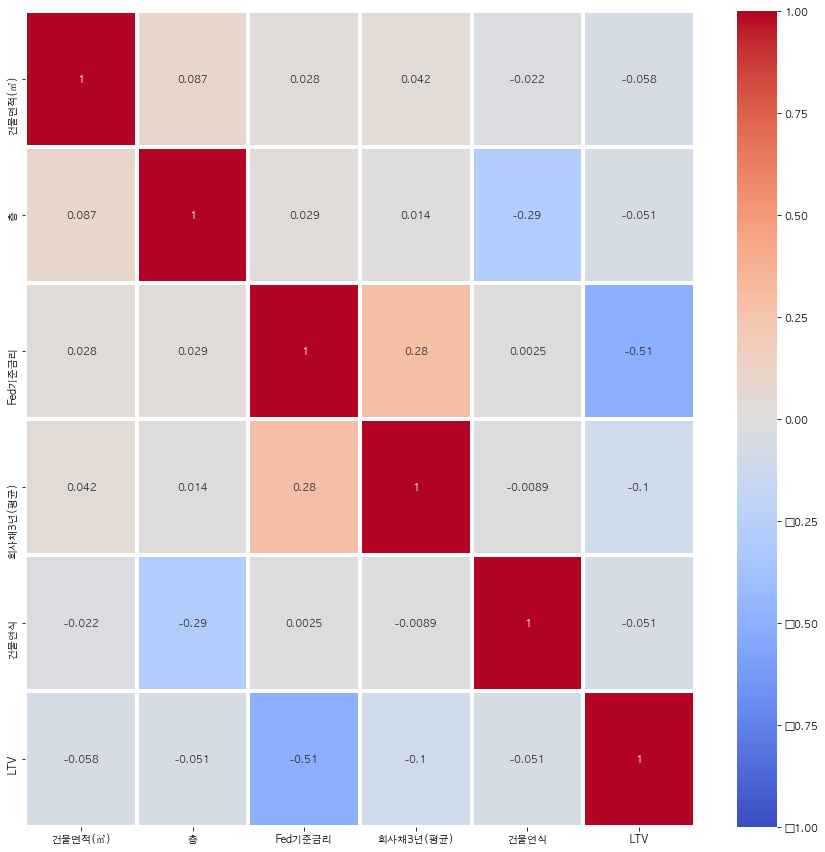

In [72]:
plot_cor(X_scaled)

# LinearRegression

## CV - R2, MSE

In [73]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기 
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [74]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.52501,           Validation Score_r2 = 0.49389
      Train Score_mse = 0.02909,           Validation Score_mse = 0.02401


Fold 2: Train Score_r2 = 0.54238,           Validation Score_r2 = 0.46491
      Train Score_mse = 0.02853,           Validation Score_mse = 0.02645


Fold 3: Train Score_r2 = 0.56298,           Validation Score_r2 = 0.42151
      Train Score_mse = 0.0275,           Validation Score_mse = 0.03131


Fold 4: Train Score_r2 = 0.56188,           Validation Score_r2 = 0.3985
      Train Score_mse = 0.02614,           Validation Score_mse = 0.03586


Fold 5: Train Score_r2 = 0.51797,           Validation Score_r2 = -0.19977
      Train Score_mse = 0.02776,           Validation Score_mse = 0.07238


CV 평균 R2 : 0.3158
CV 평균 MSE : 0.038


## 평가지표 train and test 시각화

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


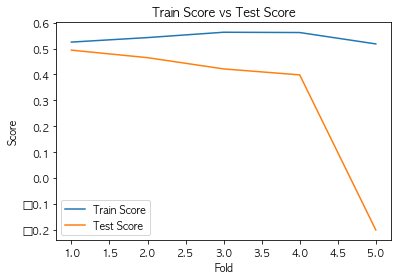

In [75]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

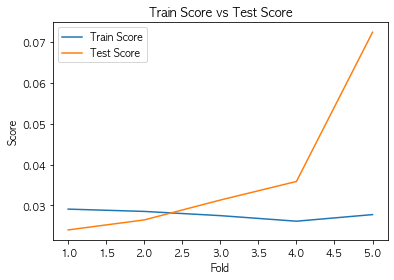

In [76]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정

- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 첫 번째로 확정

In [77]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.044, RMSE :  0.210, MAE: 0.210
Variance score :  0.651




In [78]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][0].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),1.510148
층,0.295856
건물연식,0.133783
회사채3년(평균),0.021668
Fed기준금리,-0.082889
LTV,-0.228787


# Ridge & Lasso

## Ridge

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


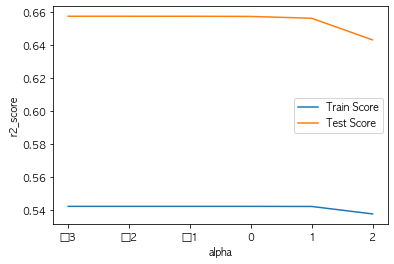

In [79]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

## CV

In [80]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.52501,           Validation Score_r2 = 0.4938
      Train Score_mse = 0.0291,           Validation Score_mse = 0.02401


Fold 2: Train Score_r2 = 0.54238,           Validation Score_r2 = 0.46483
      Train Score_mse = 0.02853,           Validation Score_mse = 0.02646


Fold 3: Train Score_r2 = 0.56298,           Validation Score_r2 = 0.42152
      Train Score_mse = 0.0275,           Validation Score_mse = 0.03131


Fold 4: Train Score_r2 = 0.56188,           Validation Score_r2 = 0.39846
      Train Score_mse = 0.02614,           Validation Score_mse = 0.03586


Fold 5: Train Score_r2 = 0.51797,           Validation Score_r2 = -0.19801
      Train Score_mse = 0.02776,           Validation Score_mse = 0.07227


CV 평균 R2 : 0.3161
CV 평균 MSE : 0.038


## 평가지표 train and test 차이 시각화

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


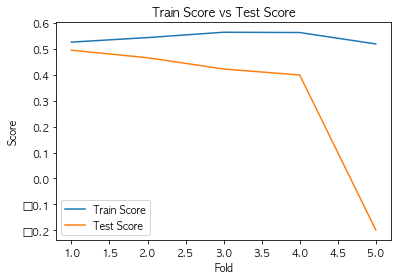

In [81]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [82]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.5420865072457777
0.6570322148384502


In [83]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.043, RMSE :  0.208, MAE: 0.208
Variance score :  0.657




In [84]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.044, RMSE :  0.210, MAE: 0.210
Variance score :  0.651




In [85]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][0].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),1.507819
층,0.295569
건물연식,0.133697
회사채3년(평균),0.021704
Fed기준금리,-0.082867
LTV,-0.228805


In [86]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.1683033216951888


In [87]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True])

___

# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [88]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

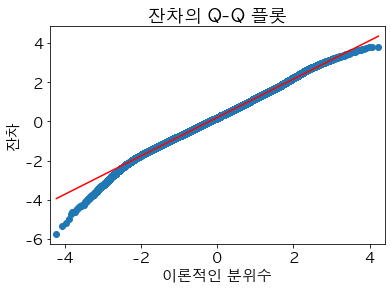

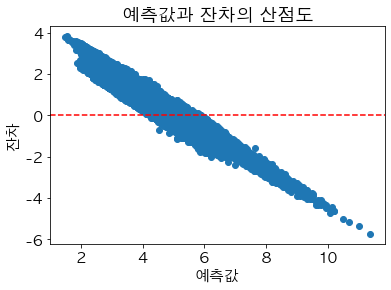

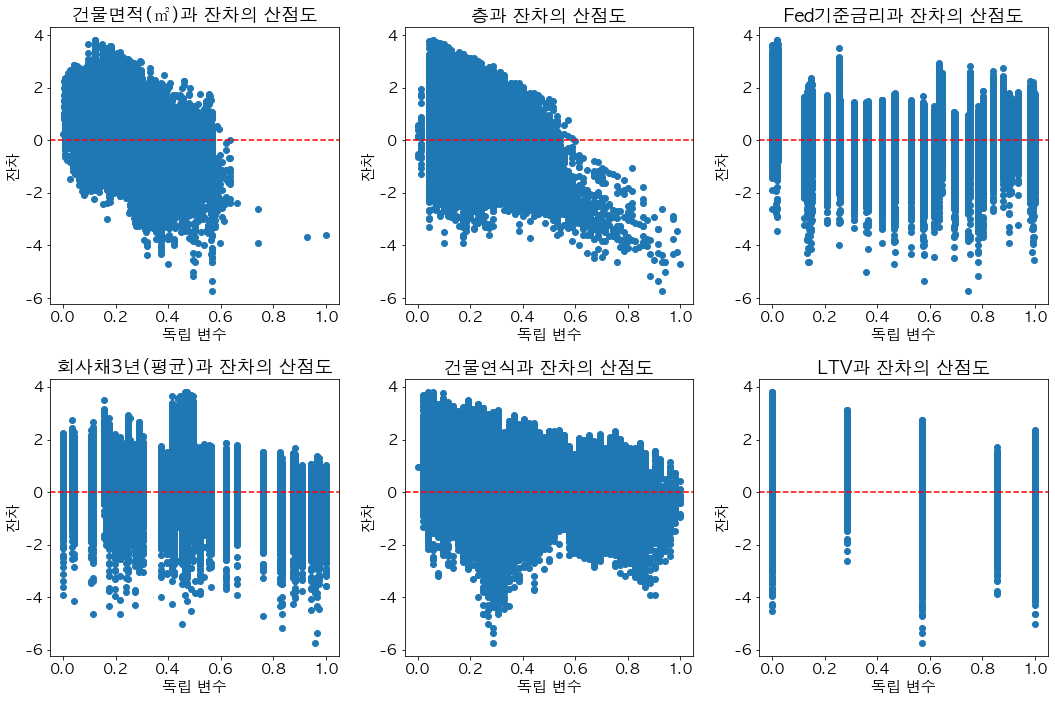

In [89]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()